# Align contigs

In [3]:
%%bash
source activate secapr_env
secapr align_sequences -h

usage: secapr align_sequences [-h] --sequences SEQUENCES --output OUTPUT
                              [--aligner {muscle,mafft}]
                              [--output-format {fasta,nexus,phylip,clustal,emboss,stockholm}]
                              [--no-trim] [--window WINDOW]
                              [--proportion PROPORTION]
                              [--threshold THRESHOLD]
                              [--max-divergence MAX_DIVERGENCE]
                              [--min-length MIN_LENGTH] [--ambiguous]
                              [--cores CORES]

Align sequences and produce separate alignment file for each locus, containing
the seqeunces of all taxa. Copyright (c) 2010-2012, Brant C. Faircloth All
rights reserved. Redistribution and use in source and binary forms, with or
without modification, are permitted provided that the following conditions are
met: * Redistributions of source code must retain the above copyright notice,
this list of conditions and the follow

Let's run the alignment. In the example command below we added the flag `--no-trim`, which avoids the algorithm to cut the alignment at the ends (= full contig sequence length is being preserved) and the flag `--ambiguous`, which allows sequences with ambiguous bases ('N') to be included into the alignments. You can decide to not use the `--no-trim` flag if you want all seqeunces in the alignments to be of the same length. In that case there are a bunch of additional flags (see above) that you can use to adjust the trimming process.


    secapr align_sequences --sequences ../../data/processed/target_contigs/extracted_target_contigs_all_samples.fasta --output ../../tests/alignments/contig_alignments/ --aligner mafft --output-format fasta --no-trim --ambiguous

The align_sequences function by default creates multiple sequence alignments (MSAs) for all loci that are shared by at least 3 samples. This leads to alignments for most of the targeted exons. We can create an overview, that shows which loci we have MSAs for (bottom line on plot below).

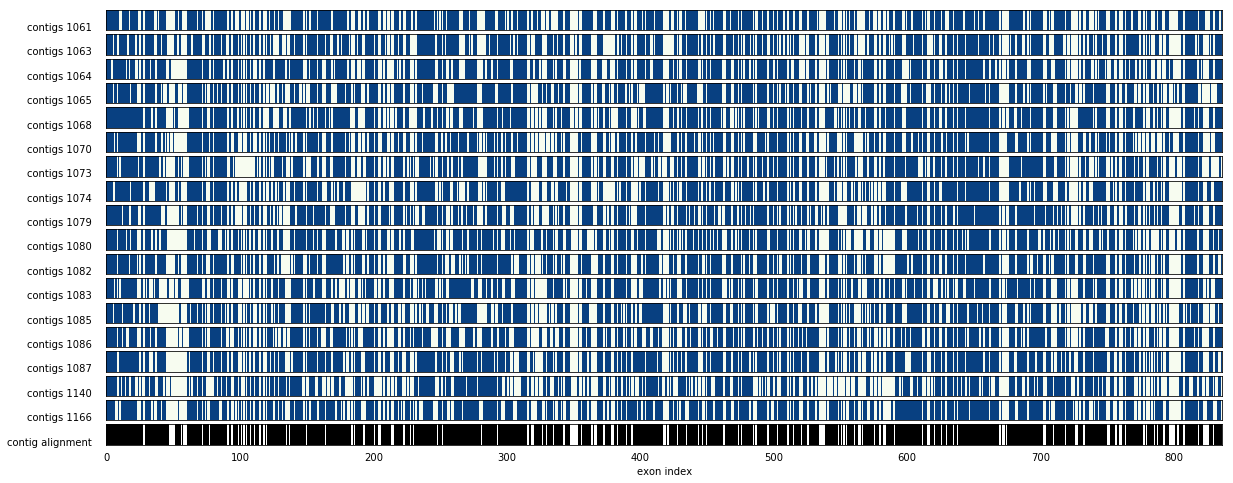

In [3]:
import sys
sys.path.append("../../src")
import plot_contig_data_function as secapr_plot

match_table_path = '../../data/processed/target_contigs/match_table.txt'
alignment_folder_path = '../../data/processed/alignments/contig_alignments'

secapr_plot.plot_contigs_and_alignments_yield(match_table_path,alignment_folder_path)


## Filling in missing sequences in alignments
Some applications (such as e.g. BEAST) require the same samples/taxa being present in every alignment. If you review your alignments you may find that many-most loci could not be assembled for all of your samples. Even though this is not the optimal turn-out it is quite normal and you can still proceed using your multilocus dataset. It is okay to have missing sequence data for some samples in the alignments, as long as it is correctly coded. Secapr has a function that adds dummy sequences consisting of ?'s for the missing taxa to your alignments, so that all alignments have the same set of taxa. All you have to do is to provide the path to the folder containign all alignments you want to sync and provide the link to the output folder.

    secapr add_missing_sequences --input ../../data/processed/alignments/contig_alignments/ --output ../../data/processed/alignments/contig_alignments_no_missing

Congratulations! You now hopefully have a whole folder full with alignments, which you can use for your downstream analyses. However, there is a lot more you can get out of your sequence capture data if you stick with us! Keep in mind that contig sequences (which your alignments consist of) constitute consensus sequences of the reads that were merged during assembly. Even though the algorithms behind assembly softwares (such as ABySS and Trinity) are well developed, they still may produce chimeric seqeunces. This means that the resulting sequence may well be a mixture between the sequences of the two possible alleles at the respective locus (for diploid organisms) or even worse a mixture between paralogous sequences from different sites. The rest of this tutorial will take you through the steps of reference-based assembly, phasing and compiling of allele sequences. Further we provide different options for SNP extraction.

The next step is to generate a new reference library from our contig sequences and to remap the reads to this library ([reference-based assembly](reference_assembly.ipynb)).

[Previous page](extract_contigs.ipynb) | [Next page](reference_assembly.ipynb)